In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Not used

## Numerical

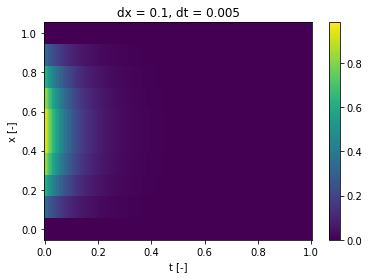

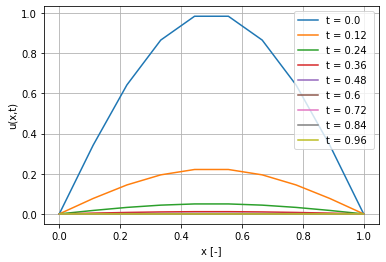

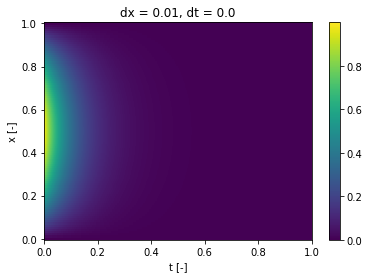

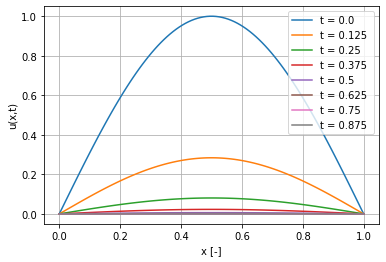

In [2]:
# Setting variables
L = 1
x0 = 0
t_term = 1
dx1 = 1/10
dx2 = 1/100

# Making list we can loop over
dx = [dx1,dx2]



# makint list to fill with solutions for different dx
ulist = []

# Running over the numerical scheme (Euler) for different dx
for elem in dx:
    dt = elem**2 * 0.5 # The criteria given in the text
    
    # Number of points for x and t
    Nt = int(t_term/dt)
    Nx = int(L/elem)
    
    # Making a linspace of evenly spaced points between minima and maxima for x and t
    x  = np.linspace(x0,L,Nx)
    t = np.linspace(0,t_term,Nt)

    # Making the solution matrix to later fill
    u = np.zeros((Nx,Nt))

    # Setting the initial values
    u[:,0] = np.sin(np.pi*x) 
    u[0,:] = 0
    u[-1,:] = 0
    
    # Solving by for loop running over x and t
    for j in range(0,Nt-1):
        for i in range(1,Nx-1):
    
            uxx = (u[i+1,j] - 2*u[i,j] + u[i-1,j])/(elem**2)
            u[i,j+1] = uxx*dt+u[i,j]
   

    # Making the plots
    
    # First plot is colormesh
    xm,tm = np.meshgrid(x,t)
    plt.pcolormesh(tm.T,xm.T,u)
    plt.xlabel("t [-]")
    plt.ylabel("x [-]")
    plt.colorbar()
    plt.title(f"dx = {elem}, dt = {np.round(dt,decimals = 4)}")
    plt.savefig(f"colormap_num_dx{elem}.pdf")
    plt.show()
    
    step = int(Nt/8)
    plot_times = np.arange(0,Nt,step)
   
    # Second plot is normal 2D plot u(x) at different t values
    for i in plot_times:
        
        plt.plot(x,u[:,i],label = f"t = {np.round(dt*i,decimals = 4)} ")
    plt.legend()
    plt.ylabel("u(x,t)")
    plt.xlabel("x [-]")
    plt.grid()
    plt.savefig(f"2dplot_num_dx{elem}.pdf")
    plt.show()
    ulist.append(u)
    


## Analytical

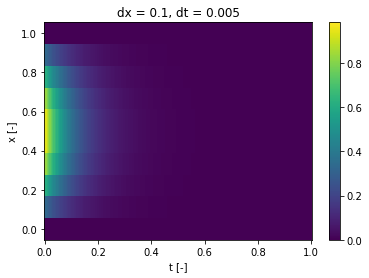

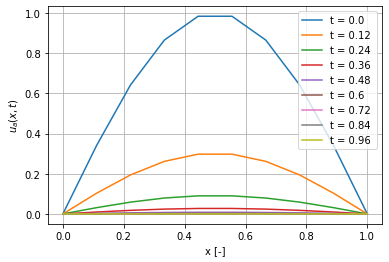

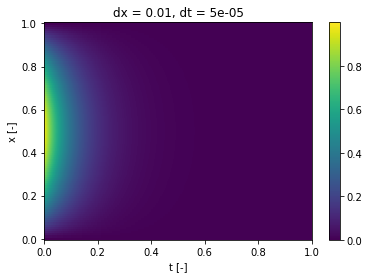

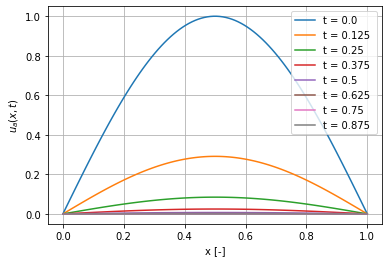

In [3]:
# Here we solve the equation analytically

dx1 = 1/10
dx2 = 1/100


dx = [dx1,dx2]

# Defining the analytical solution described in the corresponding pdf
def u_analytical(x,t):
    return np.sin(np.pi * x) * np.exp(-np.pi**2 * t)

ualist = []

# Most of this is a carbon copy of earlier loop, however now we use an analytical equation to solve
for elem in dx:
    dt = elem**2 * 0.5
    
    Nt = int(t_term/dt)
    Nx = int(L/elem)

    x  = np.linspace(x0,L,Nx)
    t = np.linspace(0,t_term,Nt)


    ua = np.zeros((Nx,Nt))
    
    
    for i,xi in np.ndenumerate(x):
        for j,tj in np.ndenumerate(t):
            ua[i,j] = u_analytical(xi,tj)
    ualist.append(ua)
    xm,tm = np.meshgrid(x,t)
    plt.pcolormesh(tm.T,xm.T,ua)
    plt.xlabel("t [-]")
    plt.ylabel("x [-]")
    plt.colorbar()
    plt.title(f"dx = {np.round(elem, decimals = 5)}, dt = {np.round(dt,decimals = 5)}")
    plt.savefig(f"colorbar_analytical_dx{elem}.pdf")
    plt.show()
    
    
    step = int(Nt/8)
    plot_times = np.arange(0,Nt,step)
   
    for i in plot_times:
        
        plt.plot(x,ua[:,i],label = f"t = {np.round(dt*i,decimals = 4)} ")
    plt.legend()
    plt.grid()
    plt.xlabel("x [-]")
    plt.ylabel("$u_a(x,t)$")
    plt.savefig(f"2dplot_analytical_dx{elem}.pdf")
    plt.show()

In [4]:
# Here we calculate the MSE

denominator0 = ulist[0].shape[0] *ulist[0].shape[1]
denominator1 = ulist[1].shape[0] * ulist[1].shape[1]

#print(ulist[0].shape,ualist[0].shape)
#print(ulist[1].shape,ualist[1].shape)
u0 = np.array(ulist[0])
ua0 = np.array(ualist[0])


u1 = np.array(ulist[1])
ua1 = np.array(ualist[1])

print("MSE for dx=0.1")
print(1/denominator0 * np.sum(u0.flatten()-ua0.flatten())**2)
print("MSE for dx=0.01")
print(1/denominator1 * np.sum(u1.flatten()-ua1.flatten())**2)

MSE for dx=0.1
0.25641828510953174
MSE for dx=0.01
3.2631094525738766
